In [33]:
from scipy.spatial import HalfspaceIntersection

In [34]:
import numpy as np

In [35]:
halfspaces = np.array([[-1, 0, 0],[0, -1, 0],[3, -2, -6],[-1, 2, -2]])                     


In [36]:
from scipy.optimize import linprog
norm_vector = np.reshape(np.linalg.norm(halfspaces[:, :-1], axis=1),
   (halfspaces.shape[0], 1))
c = np.zeros((halfspaces.shape[1],))
c[-1] = -1
A = np.hstack((halfspaces[:, :-1], norm_vector))
b = - halfspaces[:, -1:]
res = linprog(c, A_ub=A, b_ub=b)
x = res.x[:-1]

In [37]:
feasible_point = np.array(x)
hs = HalfspaceIntersection(halfspaces, feasible_point)

In [38]:
import matplotlib.pyplot as plt

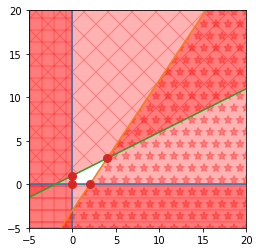

In [39]:
fig = plt.figure()
ax = fig.add_subplot('111',aspect='equal')
xlim, ylim = (-5, 20), (-5, 20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
x = np.linspace(-5, 20, 100)
symbols = ['+', '-', '*', 'x']
signs = [0, 0, 0, 1]
fmt = {"color": "red", "edgecolor": "b", "alpha": 0.3}
for h, sym, sign in zip(halfspaces, symbols, signs):
    hlist = h.tolist()
    fmt["hatch"] = sym
    if h[1]== 0:
        ax.axvline(-h[2]/h[0], label='{}x+{}y+{}<=0'.format(*hlist))
        xi = np.linspace(xlim[sign], -h[1]/h[0], 100)
        ax.fill_between(xi, ylim[0], ylim[1], **fmt)
    else:
        ax.plot(x, (-h[2]-h[0]*x)/h[1], label='{}x+{}y+{}<=0'.format(*hlist))
        ax.fill_between(x, (-h[2]-h[0]*x)/h[1], ylim[sign], **fmt)
x, y = zip(*hs.intersections)

ax.plot(x, y, 'o', markersize=8)
